Walmart Sales forecasting

Importing Packages

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import ttest_ind
import seaborn as sns
from scipy import stats
sns.set()
import warnings
import os

warnings.filterwarnings('ignore')

Connecting and Renaming the Database

In [28]:
working_directory=os.getcwd()
print(working_directory)

/Users/nisha


In [30]:
path=working_directory+'/Downloads/Walmart Data Analysis and Forcasting 2.csv'

In [31]:
sales_forecast=pd.read_csv(path)

Data Exploration

In [33]:
#Data Shape
sales_forecast.shape

(6435, 8)

In [34]:
#Data Variable and Type
sales_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Descriptive Statistics

There are four independent variables(temperature, fuel_price, CPI, unimployment) that can impact the weekly sales. store id, date and holiday flag can also reflect weekly sale.

In [35]:
sales_forecast.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


To see how data is distributed in each field

In [36]:
sales_forecast.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Based on above distribution I would be answering two question

1. is there any correlation between temperature and weekly sales.

2. is there a significant difference between holiday weekly sales and non-holiday weekly sale

Hypothesis 1

In [37]:
#to see the distribution of these two variables
sales_forecast[['Weekly_Sales', 'Temperature',]].describe()

,Weekly_Sales,Temperature
count,6.435000e+03,6435.000000
mean,1.046965e+06,60.663782
std,5.643666e+05,18.444933
min,2.099862e+05,-2.060000
25%,5.533501e+05,47.460000
50%,9.607460e+05,62.670000
75%,1.420159e+06,74.940000
max,3.818686e+06,100.140000


<Axes: xlabel='Temperature', ylabel='Count'>

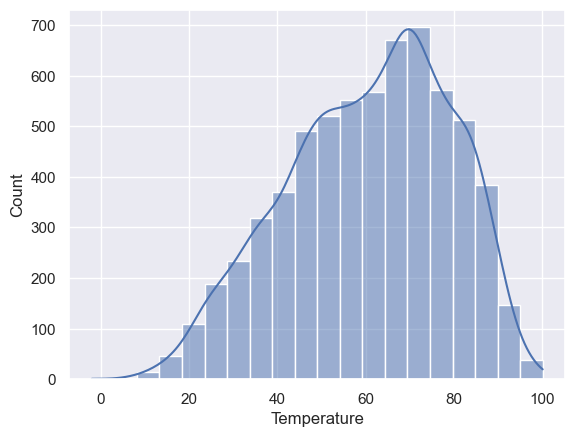

In [38]:
#to see how temperature data is distributed
sns.histplot(sales_forecast['Temperature'],bins = 20,  kde = True)

<Axes: xlabel='Weekly_Sales', ylabel='Temperature'>

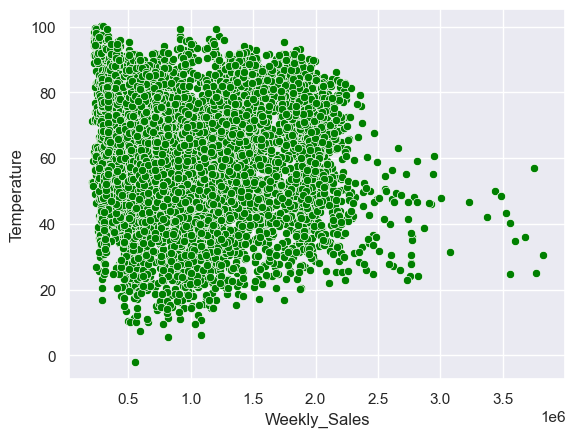

In [39]:
#seeing the corelation of weekly sale and temperature through scatterplot
sns.scatterplot(x="Weekly_Sales", y="Temperature", color='green', data=sales_forecast, )

In [40]:
sales_forecast[['Temperature','Weekly_Sales']].corr()

,Temperature,Weekly_Sales
Temperature,1.00000,-0.06381
Weekly_Sales,-0.06381,1.00000


In [41]:
sales_forecast['Temperature'].corr(sales_forecast['Weekly_Sales'])

-0.06381001317946954

In [42]:
stats.pearsonr(sales_forecast['Weekly_Sales'], sales_forecast['Temperature'])

PearsonRResult(statistic=-0.06381001317946955, pvalue=3.0076476258601934e-07)

The p value and scatter plot shows a negative weak correlation between temperature and weekly sales this means that there is a statistically significant relationship between temperature and weekly sale. hypothesis rejected

Hypothesis 2

Hypothesis: there is no difference in sales based on holiday and non-holiday weeks.

to test this hypothesis i have set two data points, sales on holiday week and non-holiday week

In [43]:
holiday_week = sales_forecast.loc[sales_forecast['Holiday_Flag']==1]
non_holiday_week = sales_forecast.loc[sales_forecast['Holiday_Flag']==0]

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

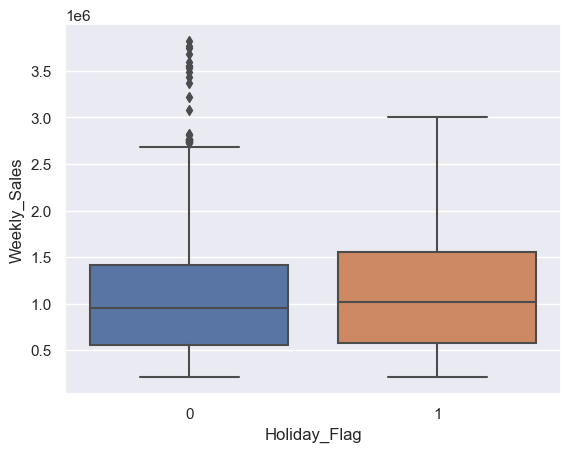

In [44]:
sns.boxplot(y = sales_forecast["Weekly_Sales"], x = sales_forecast["Holiday_Flag"])

In [45]:
stats.ttest_ind(holiday_week['Weekly_Sales'], non_holiday_week['Weekly_Sales'])

Ttest_indResult(statistic=2.9608919093259036, pvalue=0.003078699263818616)

the t-test and boxplot shows that there is a significant difference in weekly sale on holiday week and non-holiday week. this means that holiday week has better sale than non-holiday week Hypothesis Rejected

Recommendations

Both the hypothesis are rejected this means there is a significant difference in sales on hoilday and non-holiday week. and weekly sale goes down as temperature goes up